## Problem Description

In the scope of the DARGMINTS project, an annotation project was carried out which consisted of annotating argumentation structures in opinion articles published in the Público newspaper. The annotation included several layers:

1. Selecting text spans that are taken to have an argumentative role (either as premises or conclusions of arguments) -- these are Argumentative Discourse Units (ADU).
2. Connecting such ADUs through support or attack relations.
3. Classifying the propositional content of ADUs as propositions of fact, propositions of value, or propositions of policy; within propositions of value, distinguish between those with a positive (+) or negative (-) connotation.

In a proposition of fact, the content corresponds to a piece of information that can be checked for truthness. This does not usually happen with propositions of value, which denote value judgments with a strong subjective nature; often, they also have a (positive or negative) polarity attached. A proposition of policy prescribes or suggests a certain line of action, often mentioning the agents or entities that are capable of carrying out such policies.

The aim of this assignment is to build a classifier of types of ADUs, thus focusing on the last annotation step described above. For that, you have access to two different files:

- A file containing the content of each annotated ADU span and its 5-class classification: Value, Value(+), Value(-), Fact, or Policy. For each ADU, we also know the annotator and the document from which it has been taken.
- A file containing details for each opinion article that has been annotated, including the full article content.
Besides ADU contents, you can make use of any contextual information provided in the corresponding opinion article.

Each opinion article has been annotated by 3 different annotators. For that reason, you will find in the ADU file an indication of which annotator has obtained the ADU. It may happen that the same ADU has been annotated by more than one annotator. When that is the case, they do not necessarily agree on the type of proposition.

How good a classifier (or set of classifiers) can you get? Don't forget to properly split the dataset in a sensible manner, so that you have a proper test set. Start by obtaining an arbitrary baseline, against which you can then compare your improvements.

Portuguese NLKT: https://www.nltk.org/howto/portuguese_en.html

### Data Analysis

In [1]:
import pandas as pd
data = pd.read_excel('OpArticles/OpArticles.xlsx')
data_ADU = pd.read_excel('OpArticles/OpArticles_ADUs.xlsx')
data_nc = pd.read_excel('./OpArticles/NoConflicts.xlsx')

In [2]:
# TODO

display("Articles Data", data.head())
display("ADU Data", data_ADU.head())

'Articles Data'

,article_id,title,authors,body,meta_description,topics,keywords,publish_date,url_canonical
0,5d04a31b896a7fea069ef06f,"Pouco pão e muito circo, morte e bocejo",['José Vítor Malheiros'],"O poeta espanhol António Machado escrevia, uns...","É tudo cómico na FIFA, porque todos os dias a ...",Sports,"['Brasil', 'Campeonato do Mundo', 'Desporto', ...",2014-06-17 00:16:00,https://www.publico.pt/2014/06/17/desporto/opi...
1,5d04a3fc896a7fea069f0717,Portugal nos Mundiais de Futebol de 2010 e 2014,['Rui J. Baptista'],“O mais excelente quadro posto a uma luz logo ...,Deve ser evidenciado o clima favorável criado ...,Sports,"['Brasil', 'Campeonato do Mundo', 'Coreia do N...",2014-07-05 02:46:00,https://www.publico.pt/2014/07/05/desporto/opi...
2,5d04a455896a7fea069f07ab,"Futebol, guerra, religião",['Fernando Belo'],1. As sociedades humanas parecem ser regidas p...,O futebol parece ser um sucedâneo quer da lei ...,Sports,"['A guerra na Síria', 'Desporto', 'Futebol', '...",2014-07-12 16:05:33,https://www.publico.pt/2014/07/12/desporto/opi...
3,5d04a52f896a7fea069f0921,As razões do Qatar para acolher o Mundial em 2022,['Hamad bin Khalifa bin Ahmad Al Thani'],Este foi um Mundial incrível. Vimos actuações ...,Queremos cooperar plenamente com a investigaçã...,Sports,"['Desporto', 'FIFA', 'Futebol', 'Mundial de fu...",2014-07-27 02:00:00,https://www.publico.pt/2014/07/27/desporto/opi...
4,5d04a8d7896a7fea069f6997,A política no campo de futebol,['Carlos Nolasco'],O futebol sempre foi um jogo aparentemente sim...,Retirar a expressão política do futebol é reti...,Sports,"['Albânia', 'Campeonato da Europa', 'Desporto'...",2014-10-23 00:16:00,https://www.publico.pt/2014/10/23/desporto/opi...


'ADU Data'

,article_id,annotator,node,ranges,tokens,label
0,5d04a31b896a7fea069ef06f,A,0,"[[2516, 2556]]",O facto não é apenas fruto da ignorância,Value
1,5d04a31b896a7fea069ef06f,A,1,"[[2568, 2806]]",havia no seu humor mais jornalismo (mais inves...,Value
2,5d04a31b896a7fea069ef06f,A,3,"[[3169, 3190]]",É tudo cómico na FIFA,Value
3,5d04a31b896a7fea069ef06f,A,4,"[[3198, 3285]]",o que todos nós permitimos que esta organizaçã...,Value
4,5d04a31b896a7fea069ef06f,A,6,"[[4257, 4296]]",não nos fazem rir à custa dos poderosos,Value


In [3]:
print("---------------------Articles---------------------")
data.info()
print("---------------------ADU---------------------")
data_ADU.info()

---------------------Articles---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        373 non-null    object
 1   title             373 non-null    object
 2   authors           373 non-null    object
 3   body              373 non-null    object
 4   meta_description  373 non-null    object
 5   topics            373 non-null    object
 6   keywords          373 non-null    object
 7   publish_date      373 non-null    object
 8   url_canonical     373 non-null    object
dtypes: object(9)
memory usage: 26.4+ KB
---------------------ADU---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  16743 non-null  object
 1   annotator   16743 n

#### Description of tables

In [4]:
display("Articles data", data.describe(include='all'))
display("ADU data", data_ADU.describe(include='all'))

'Articles data'

,article_id,title,authors,body,meta_description,topics,keywords,publish_date,url_canonical
count,373,373,373,373,373,373,373,373,373
unique,373,373,373,373,373,8,356,372,373
top,5d04c671896a7fea06a11275,A tarefa mais difícil da História americana,['Vasco Lourenço'],"Na União Europeia, muito se tem falado da nece...",A crise na habitação é a maior urgência da cap...,Sports,"['Desporto', 'Opinião']",2016-08-04 00:30:00,https://www.publico.pt/2019/04/30/ciencia/opin...
freq,1,1,1,1,1,52,4,2,1


'ADU data'

,article_id,annotator,node,ranges,tokens,label
count,16743,16743,16743.000000,16743,16743,16743
unique,373,4,NaN,11929,12008,5
top,5cf464b6896a7fea06ffbb9d,B,NaN,"[[0, 138]]",Não é verdade,Value
freq,142,5226,NaN,6,8,8102
mean,NaN,NaN,14.938960,NaN,NaN,NaN
std,NaN,NaN,14.033932,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,11.000000,NaN,NaN,NaN
75%,NaN,NaN,21.000000,NaN,NaN,NaN


### Preprocessing

#### Stemming and Stopwords

In [2]:
import re
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

stopwords = stopwords.words("portuguese")
stemmer = RSLPStemmer()

def buildCorpus(dataframe):
    corpus = []
    for token in dataframe["tokens"]:
        c_tk = re.sub('[^a-zA-Z\u00C0-\u00ff]', ' ', token.lower())
        c_tk = " ".join(stemmer.stem(w) for w in c_tk.split() if w == "não" or w not in stopwords)
        corpus.append(c_tk)
    return corpus


In [7]:
corpus = buildCorpus(data_ADU)
print(corpus[:3])
print(len(corpus))

['fact não apen frut ignor', 'hav hum jorn investig preocup aprofund contextual histór isenç relat preocup soc urg denunci muit peç real jorn', 'tud cómic fif']
16743


#### Lemmatization

In [6]:
# TODO - Experiment with NLPyPort

### Language Models

#### Basic bag of words model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def bowModel(corpus):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(corpus).toarray()

#### N-gram

In [4]:
def bigramModel(corpus):
    vectorizer = CountVectorizer(ngram_range=(2,2))
    return vectorizer.fit_transform(corpus).toarray()

def unibigramModel(corpus):
    vectorizer = CountVectorizer(ngram_range=(1,2))
    return vectorizer.fit_transform(corpus).toarray()

def trigramModel(corpus):
    vectorizer = CountVectorizer(ngram_range=(3,3))
    return vectorizer.fit_transform(corpus).toarray()

#### TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidfModel(corpus):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(corpus).toarray()

def tfidfBiModel(corpus):
    vectorizer = TfidfVectorizer(ngram_range=(2,2))
    return vectorizer.fit_transform(corpus).toarray()

def tfidfUniBiModel(corpus):
    vectorizer = TfidfVectorizer(ngram_range=(1,2))
    return vectorizer.fit_transform(corpus).toarray()

def tfidfTriModel(corpus):
    vectorizer = TfidfVectorizer(ngram_range=(3,3))
    return vectorizer.fit_transform(corpus).toarray()

### Train/Test split

#### Simple split

In [3]:
from sklearn.model_selection import train_test_split

def simpleSplit(X, y, test_size = 0.2):
    print(f"X -> {X.shape} | y -> {y.shape}")
    return train_test_split(X, y, test_size = test_size, random_state = 0, stratify=y)

### Balance the dataset

#### Oversampling

In [15]:
# TODO - Experiment with different resampling algos

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_ADU.label)

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
XR_res, yR_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(yR_res)}")
print(f"Testing target statistics: {Counter(y_test)}")


X -> (16743, 69814) | y -> (16743,)
Training target statistics: Counter({'Value': 6481, 'Value(-)': 6481, 'Fact': 6481, 'Policy': 6481, 'Value(+)': 6481})
Testing target statistics: Counter({'Value': 1621, 'Fact': 733, 'Value(-)': 580, 'Value(+)': 282, 'Policy': 133})


In [13]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({'Value': 6481, 'Value(-)': 6481, 'Fact': 6481, 'Policy': 6481, 'Value(+)': 6481})
Testing target statistics: Counter({'Value': 1621, 'Fact': 733, 'Value(-)': 580, 'Value(+)': 282, 'Policy': 133})


#### Undersampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
XU_res, yU_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(yU_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({'Fact': 534, 'Policy': 534, 'Value': 534, 'Value(+)': 534, 'Value(-)': 534})
Testing target statistics: Counter({'Value': 1621, 'Fact': 733, 'Value(-)': 580, 'Value(+)': 282, 'Policy': 133})


In [18]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
XN_res, yN_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(yN_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({'Fact': 534, 'Policy': 534, 'Value': 534, 'Value(+)': 534, 'Value(-)': 534})
Testing target statistics: Counter({'Value': 1621, 'Fact': 733, 'Value(-)': 580, 'Value(+)': 282, 'Policy': 133})


### Models

#### Evaluation functions

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import json

def padded_print(text, length=60):
    leading = (length - len(text)) // 2
    trailing = length - len(text) - leading
    print("-" * leading + text + "-" * trailing)
    print()

def model_evaluation(y_pred, y_true, name="", save=True):
    labels = ["Fact", "Policy", "Value", "Value(+)", "Value(-)"]
    padded_print("Classification Report")
    print(classification_report(y_true, y_pred))
    padded_print("Confusion Matrix")

    plt.figure(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, square=True, fmt="g", cmap="viridis", xticklabels=labels, yticklabels=labels)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("True", fontsize=14)
    ax.set_title(f"Confusion Matrix {name}", fontsize=16, pad=20)
    
    if save:
        timestamp = datetime.now()
        Path(f"./Results/{name} - {timestamp}").mkdir(parents=True, exist_ok=True)
        with open(f"./Results/{name} - {timestamp}/classification_report.json", "w") as out:
            json.dump(classification_report(y_true, y_pred, output_dict=True), out)
        plt.savefig(f"./Results/{name} - {timestamp}/confusion_matrix.png")

    plt.show()


In [8]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [9]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, kfold, X, y):
  return cross_val_score(model, X, y, cv=kfold)

-------------------Classification Report--------------------

              precision    recall  f1-score   support

        Fact       0.33      0.32      0.33       733
      Policy       0.26      0.61      0.36       133
       Value       0.57      0.27      0.36      1621
    Value(+)       0.17      0.47      0.25       282
    Value(-)       0.27      0.37      0.31       580

    accuracy                           0.33      3349
   macro avg       0.32      0.41      0.32      3349
weighted avg       0.42      0.33      0.34      3349

----------------------Confusion Matrix----------------------



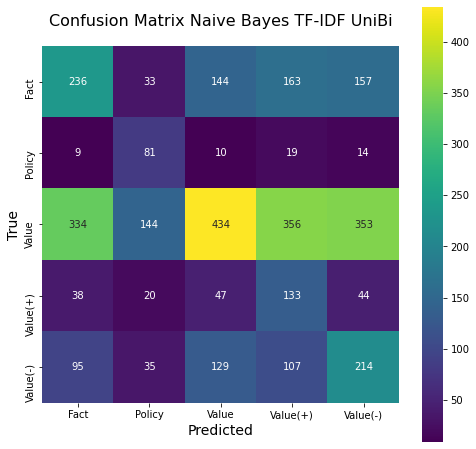

In [27]:
# Test balance

from sklearn.ensemble import RandomForestClassifier

clfRF = RandomForestClassifier(max_depth=50)

clfRF.fit(XU_res, yU_res)
y_pred = clfRF.predict(X_test)

model_evaluation(y_pred, y_test, "Naive Bayes TF-IDF UniBi")


#### Naive Bayes

In [5]:
# TODO - Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_nc.label)

clfNB = MultinomialNB()
#parameters= {
  #"alpha":[0, 0.5, 1.0, 1.5, 2.0],
  #"fit_prior":[True, False],
#}

#cv = GridSearchCV(clfNB,parameters,cv=5)
#cv.fit(X_train, y_train.ravel())

#display(cv)

clfNB.fit(X_train, y_train)
y_pred = clfNB.predict(X_test)

model_evaluation(y_pred, y_test, "Naive Bayes TF-IDF UniBi")

X_train, X_test, y_train, y_test = (None,) * 4

NameError: name 'simpleSplit' is not defined

In [16]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_ADU.label)

clfGNB = GaussianNB()
clfGNB.fit(X_train, y_train)

y_pred = clfGNB.predict(X_test)
print(y_pred)

model_evaluation(y_pred, y_test, "GaussNB TF-IDF UniBi")

X_train, X_test, y_train, y_test = (None,) * 4

X -> (16743, 69814) | y -> (16743,)


Error: Canceled future for execute_request message before replies were done

#### Logistic Regression

In [ ]:
# Regularization is applied by default

from sklearn.linear_model import LogisticRegression
import numpy as np

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_ADU.label)

clfLR = LogisticRegression(penalty='l2', C=0.615848211066026, solver='liblinear')
#parameters = {
  #"penalty": ["l1", "l2"],
  #"C": np.logspace(-4, 4, 20),
  #"solver": ["liblinear"]
#}

#cv = GridSearchCV(clfLR,parameters,cv=5)
#cv.fit(X_train, y_train.ravel())

#display(cv)

clfLR.fit(X_train, y_train)

y_pred = clfLR.predict(X_test)
print(y_pred)

model_evaluation(y_pred, y_test, "LinReg TF-IDF UniBi")

X_train, X_test, y_train, y_test = (None,) * 4

#### Decision Tree

In [ ]:
# TODO - Decision Tree

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_ADU.label)

clfDT = DecisionTreeClassifier(max_depth=5)
#parameters= {
  #"criterion":['gini', 'entropy'],
  #"splitter":['best', 'random'],
  #"max_depth": [2,3,4,5, None]
#}

#cv = GridSearchCV(clfDT,parameters,cv=5)
#cv.fit(X_train, y_train.ravel())

#display(cv)

clfDT.fit(X_train, y_train)

y_pred = clfDT.predict(X_test)
print(y_pred)

model_evaluation(y_pred, y_test, "DT TF-IDF UniBi")

X_train, X_test, y_train, y_test = (None,) * 4

#### Random Forest

X -> (12008, 8256) | y -> (12008,)
['Value' 'Value' 'Value' ... 'Value' 'Value' 'Value']
-------------------Classification Report--------------------

              precision    recall  f1-score   support

        Fact       0.65      0.06      0.12       637
      Policy       0.00      0.00      0.00       107
       Value       0.48      0.98      0.64      1135
    Value(+)       0.00      0.00      0.00       170
    Value(-)       0.70      0.02      0.04       353

    accuracy                           0.48      2402
   macro avg       0.37      0.21      0.16      2402
weighted avg       0.50      0.48      0.34      2402

----------------------Confusion Matrix----------------------



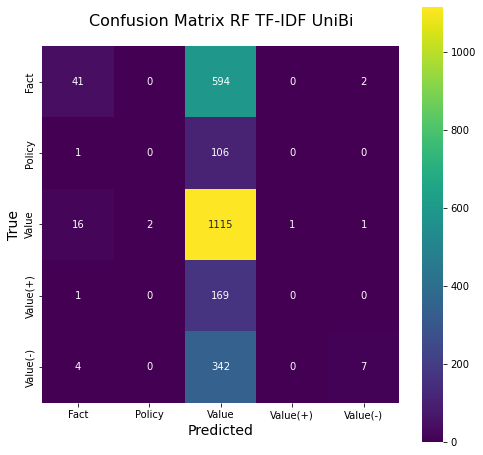

In [7]:
# TODO - Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = simpleSplit(bowModel(corpus), data_nc.label)

clfRF = RandomForestClassifier(max_depth=50)
#parameters= {
   #"n_estimators":[5,10,50,100,250],
   #"max_depth":[2,4,8,16,32,None]
#}

#cv = GridSearchCV(clfRF,parameters,cv=5)
#cv.fit(X_train, y_train.ravel())

#display(cv)

clfRF.fit(X_train, y_train)

y_pred = clfRF.predict(X_test)
print(y_pred)

model_evaluation(y_pred, y_test, "RF TF-IDF UniBi")

X_train, X_test, y_train, y_test = (None,) * 4

#### SVM

In [ ]:
from sklearn import svm

X_train, X_test, y_train, y_test = simpleSplit(tfidfUniBiModel(corpus), data_ADU.label)

clfSVC = svm.SVC(kernel="sigmoid")

clfSVC.fit(X_train, y_train)

y_pred = clfSVC.predict(X_test)
print(y_pred)

model_evaluation(y_pred, y_test, "SVM TF-IDF UniBi")

#### SGD

In [8]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = simpleSplit(bowModel(corpus), data_ADU.label)

clfSGD = SGDClassifier()

clfSGD.fit(X_train, y_train)

y_pred = clfSGD.predict(X_test)
print(y_pred)


X -> (16743, 8256) | y -> (16743,)
['Value' 'Value(-)' 'Value(-)' ... 'Value' 'Value' 'Value']


NameError: name 'model_evaluation' is not defined

-------------------Classification Report--------------------

              precision    recall  f1-score   support

        Fact       0.40      0.33      0.36       733
      Policy       0.54      0.41      0.47       133
       Value       0.58      0.69      0.63      1621
    Value(+)       0.41      0.29      0.34       282
    Value(-)       0.47      0.41      0.44       580

    accuracy                           0.52      3349
   macro avg       0.48      0.43      0.45      3349
weighted avg       0.51      0.52      0.51      3349

----------------------Confusion Matrix----------------------



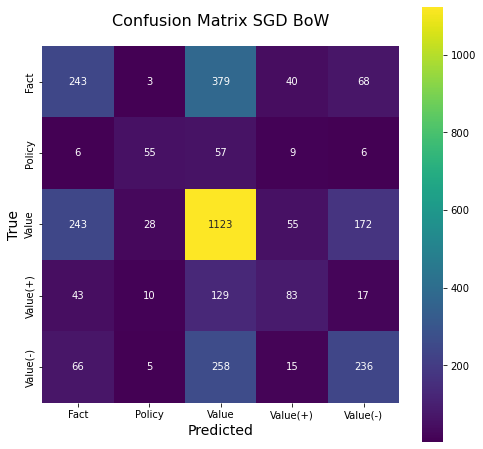

In [10]:

model_evaluation(y_pred, y_test, "SGD BoW")

## Ensemble learning

In [50]:
# data_A = data_ADU[data_ADU.annotator == "A"]
# data_B = data_ADU[data_ADU.annotator == "B"]
# data_C = data_ADU[data_ADU.annotator == "C"]
# data_D = data_ADU[data_ADU.annotator == "D"]

# corpus_A = buildCorpus(data_A)
# corpus_B = buildCorpus(data_B)
# corpus_C = buildCorpus(data_C)
# corpus_D = buildCorpus(data_D)

X_train, X_test, y_train, y_test = simpleSplit(bowModel(corpus), data_ADU.label)

X_train_A, y_train_A = [], []
X_train_B, y_train_B = [], []
X_train_C, y_train_C = [], []
X_train_D, y_train_D = [], []

for idx, x in enumerate(X_train):
    if data_ADU.iloc[idx].annotator == "A":
        X_train_A.append(x)
        y_train_A.append(y_train.iloc[idx])
    elif data_ADU.iloc[idx].annotator == "B":
        X_train_B.append(x)
        y_train_B.append(y_train.iloc[idx])
    elif data_ADU.iloc[idx].annotator == "C":
        X_train_C.append(x)
        y_train_C.append(y_train.iloc[idx])
    elif data_ADU.iloc[idx].annotator == "D":
        X_train_D.append(x)
        y_train_D.append(y_train.iloc[idx])

X_train_A, y_train_A = np.asarray(X_train_A), np.asarray(y_train_A)
X_train_B, y_train_B = np.asarray(X_train_B), np.asarray(y_train_B)
X_train_C, y_train_C = np.asarray(X_train_C), np.asarray(y_train_C)
X_train_D, y_train_D = np.asarray(X_train_D), np.asarray(y_train_D)

print(f"A: X -> {X_train_A.shape} | y -> {y_train_A.shape}")
print(f"B: X -> {X_train_B.shape} | y -> {y_train_B.shape}")
print(f"C: X -> {X_train_C.shape} | y -> {y_train_C.shape}")
print(f"D: X -> {X_train_D.shape} | y -> {y_train_D.shape}")


# X_train_A, X_test_A, y_train_A, y_test_A = simpleSplit(bowModel(corpus_A), data_A.label)
# X_train_B, X_test_B, y_train_B, y_test_B = simpleSplit(bowModel(corpus_B), data_B.label)
# X_train_C, X_test_C, y_train_C, y_test_C = simpleSplit(bowModel(corpus_C), data_C.label)
# X_train_D, X_test_D, y_train_D, y_test_D = simpleSplit(bowModel(corpus_D), data_D.label)

clf_A = SGDClassifier(loss="log")
clf_B = SGDClassifier(loss="log")
clf_C = SGDClassifier(loss="log")
clf_D = SGDClassifier(loss="log")

clf_A.fit(X_train_A, y_train_A)
clf_B.fit(X_train_B, y_train_B)
clf_C.fit(X_train_C, y_train_C)
clf_D.fit(X_train_D, y_train_D)

pred_A = clf_A.predict_proba(X_test)
pred_B = clf_B.predict_proba(X_test)
pred_C = clf_C.predict_proba(X_test)
pred_D = clf_D.predict_proba(X_test)

pred = (pred_A + pred_B + pred_C + pred_D) / 4


X -> (16743, 8256) | y -> (16743,)
A: X -> (2572, 8256) | y -> (2572,)
B: X -> (4037, 8256) | y -> (4037,)
C: X -> (3290, 8256) | y -> (3290,)
D: X -> (3495, 8256) | y -> (3495,)


In [47]:
from sklearn.ensemble import VotingClassifier

clfVoting = VotingClassifier(
    estimators=list(zip(["A", "B", "C", "D"], [clf_A, clf_B, clf_C, clf_D])),
    voting="soft"
)


In [48]:

clfVoting.fit(X_train, y_train)


VotingClassifier(estimators=[('A', SGDClassifier(loss='log')),
                             ('B', SGDClassifier(loss='log')),
                             ('C', SGDClassifier(loss='log')),
                             ('D', SGDClassifier(loss='log'))],
                 voting='soft')

-------------------Classification Report--------------------

              precision    recall  f1-score   support

        Fact       0.43      0.32      0.37       733
      Policy       0.62      0.32      0.42       133
       Value       0.55      0.76      0.64      1621
    Value(+)       0.44      0.19      0.27       282
    Value(-)       0.48      0.32      0.38       580

    accuracy                           0.52      3349
   macro avg       0.51      0.38      0.41      3349
weighted avg       0.51      0.52      0.49      3349

----------------------Confusion Matrix----------------------



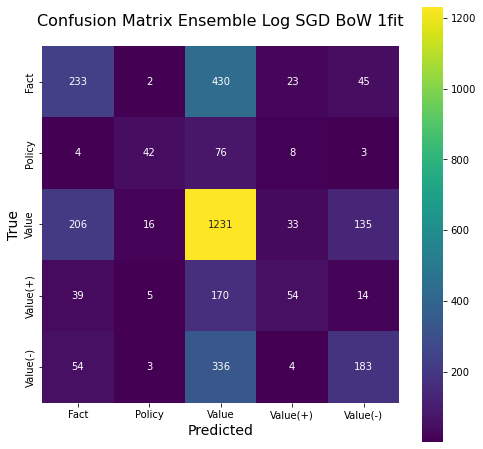

In [49]:
y_pred = clfVoting.predict(X_test)


In [53]:
print(y_test)

2674     Value(-)
7609     Value(-)
10747    Value(-)
12931        Fact
4107     Value(+)
           ...   
8773        Value
13538    Value(-)
1782        Value
9772        Value
11212       Value
Name: label, Length: 3349, dtype: object


In [ ]:
pred_classes = []

for p in pred:
    m = max(p)
    c = np.where(p == m)
    pred_classes.append(clf_A.classes_[c][0])

# print(pred_classes)

-------------------Classification Report--------------------

              precision    recall  f1-score   support

        Fact       0.43      0.29      0.35       733
      Policy       0.61      0.21      0.31       133
       Value       0.54      0.80      0.64      1621
    Value(+)       0.43      0.13      0.20       282
    Value(-)       0.48      0.24      0.32       580

    accuracy                           0.51      3349
   macro avg       0.50      0.34      0.37      3349
weighted avg       0.50      0.51      0.47      3349

----------------------Confusion Matrix----------------------



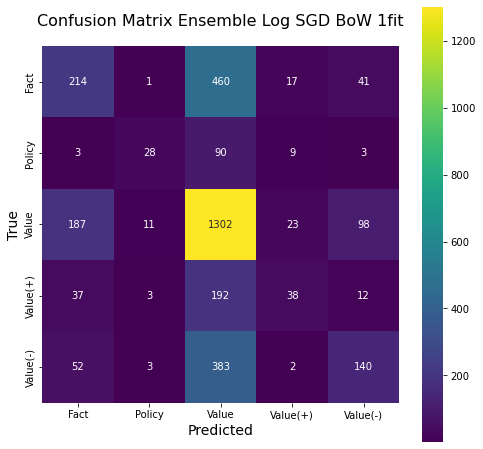

In [57]:

model_evaluation(pred_classes, y_test, "Ensemble Log SGD BoW 1fit")